<a href="https://colab.research.google.com/github/MRazin172/CV_Lab3/blob/main/2348534_CV_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

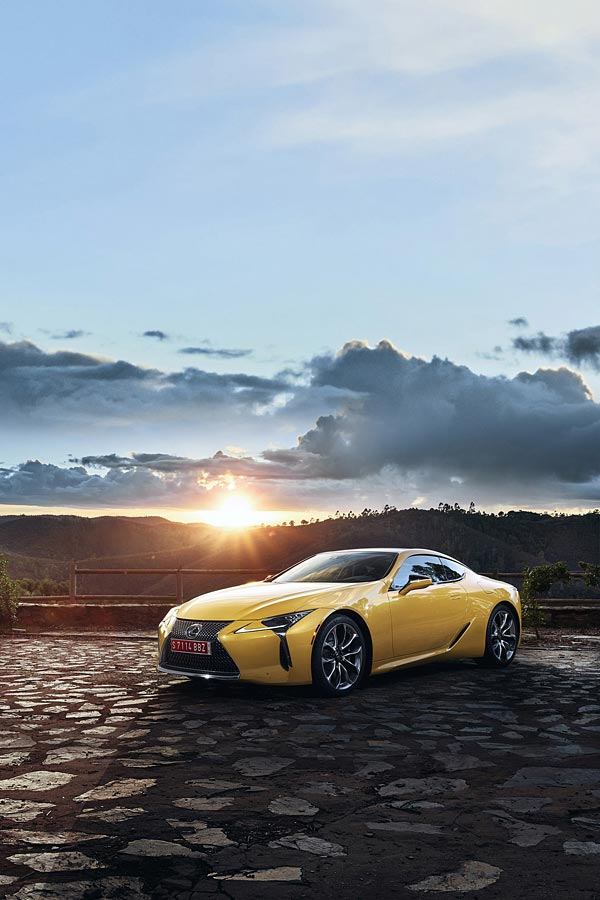

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/2017-Lexus-LC-500-001.jpg')
cv2_imshow(img)


#Image Negative

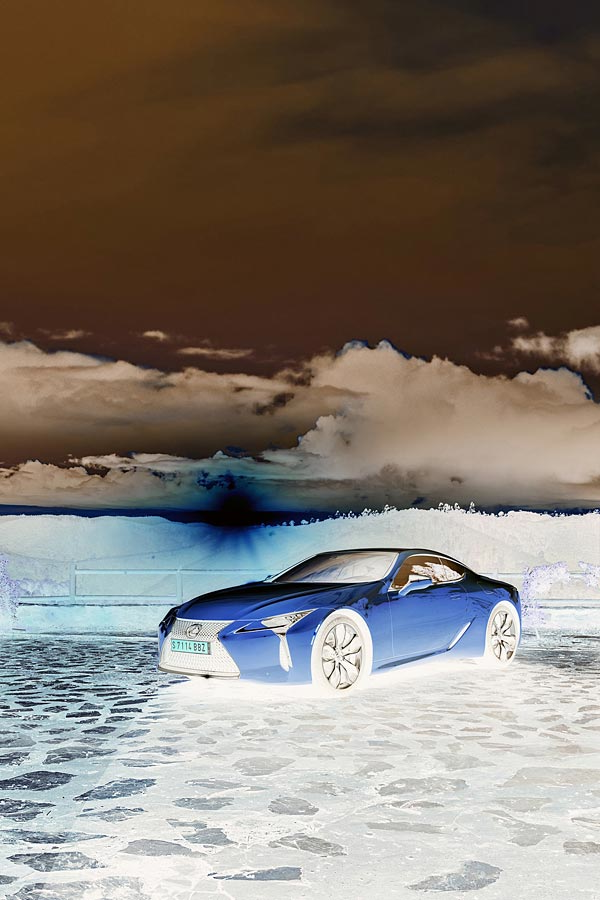

In [ ]:
from google.colab.patches import cv2_imshow
import cv2


img_negative = 255 - img

cv2_imshow(img_negative)


this is the negative of the input image

#Gray Level Slicing

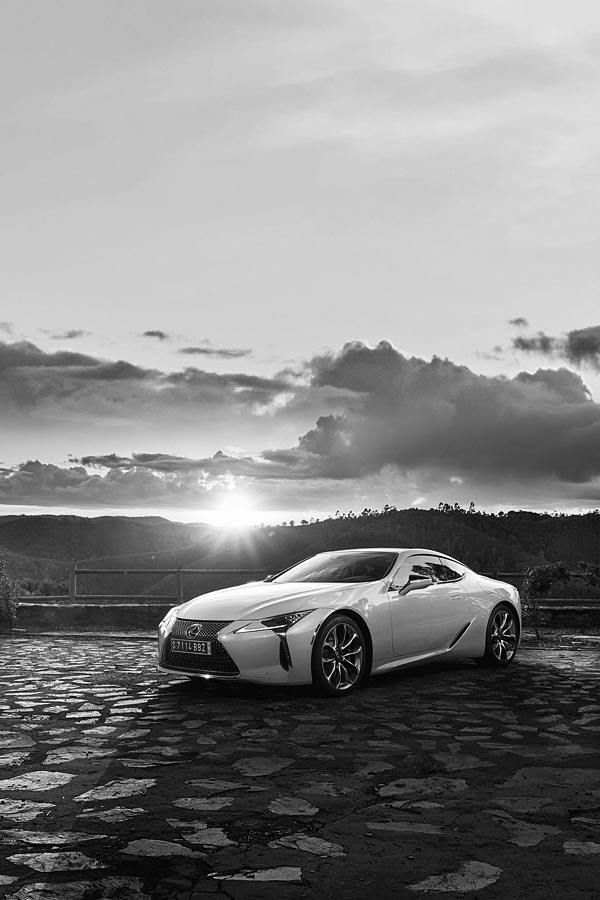

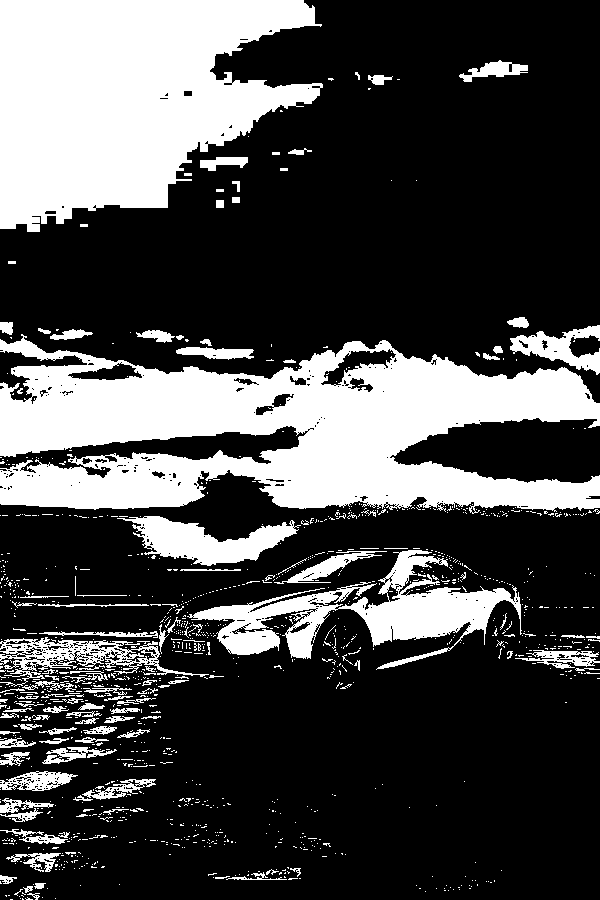

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

low = 100
high = 200

img_sliced = np.where((img_gray >= low) & (img_gray <= high), 255, 0).astype(np.uint8)

cv2_imshow(img_gray)
cv2_imshow(img_sliced)


here the fisrt image is the origial image which is changed to grayscale.

the second image is the gray sliced image

gray level slicing enhances some range of pixels. here the black pixels with intensity level 0 and pixels ranging in 255 which are white are both enhanced.
all the other pixel ranges in gray are discarded.

#Histogram Equalization

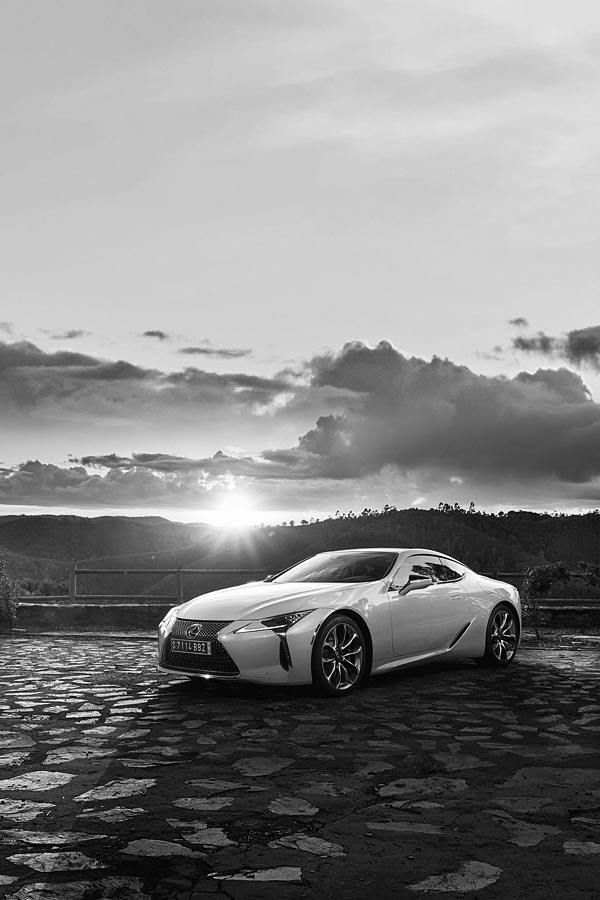

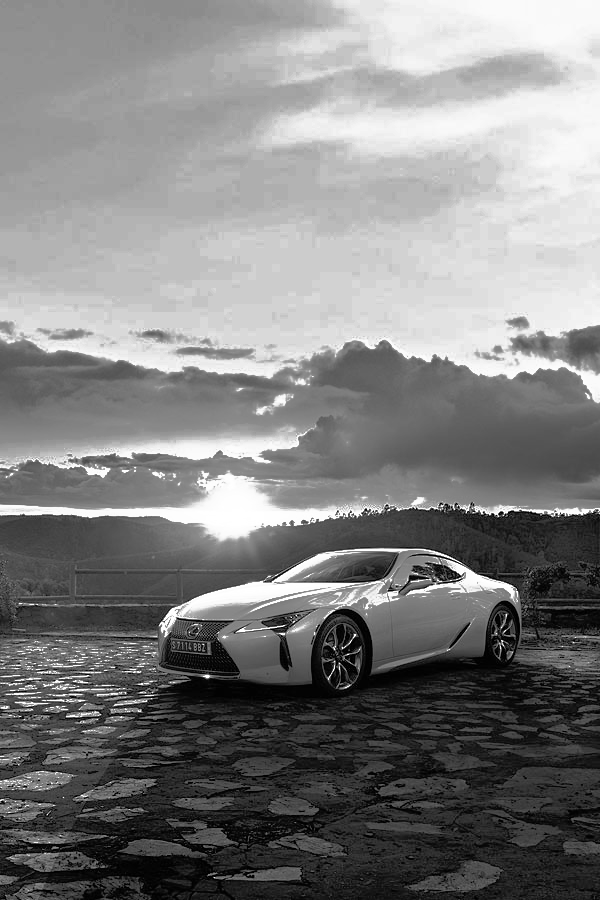

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img_equalized = cv2.equalizeHist(img_gray)

cv2_imshow(img_gray)
cv2_imshow(img_equalized)


here the first img is the original gray img.

the 2nd image is the equalized img

in an image there will be pixels of different intesities ranging from 0 to 255. these pixels maybe unevenly distributed ehcih means that for example most of the pixels may lie in the lower range making the image appear more dark.

histogram equalization is the process where these pixels are made to be distributed evenly.

#USER DEIFNED

Negative of image

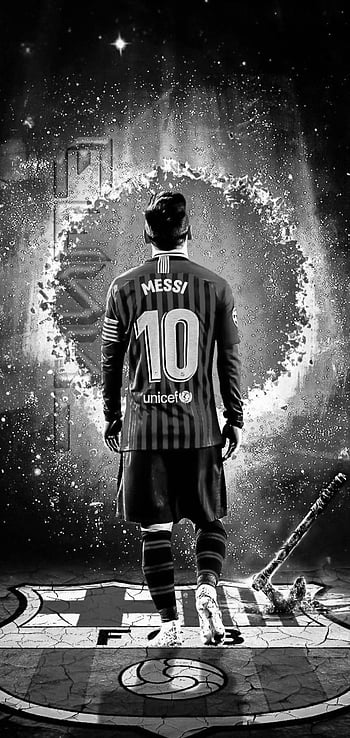

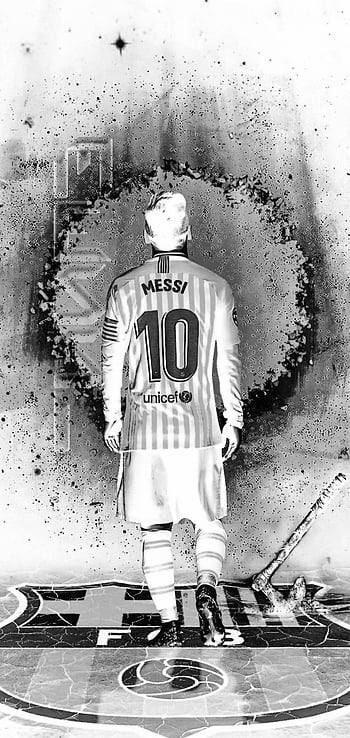

In [1]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/desktop-wallpaper-messi-of-lionel-messi-messi-cool-thumbnail.jpg', cv2.IMREAD_GRAYSCALE)

def image_negative(image):
    return 255 - image

negative_image = image_negative(image)

cv2_imshow(image)
cv2_imshow(negative_image)


Gray level slicing

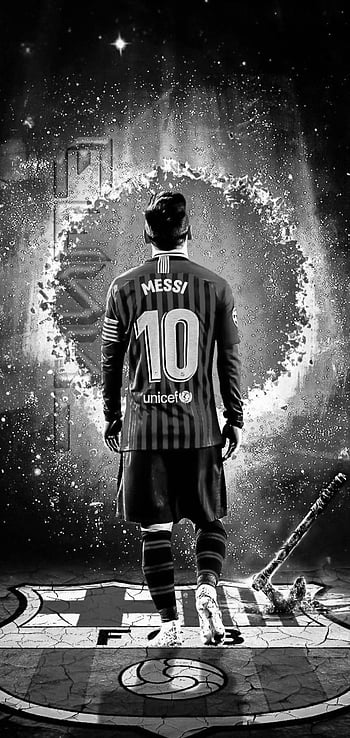

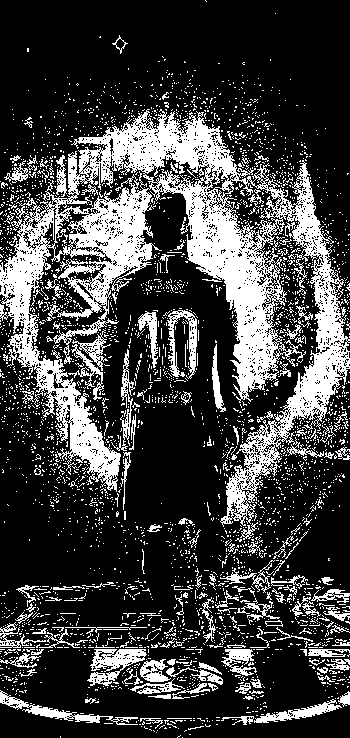

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def gray_level_slicing(image, lower_threshold, upper_threshold):
    output_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] >= lower_threshold and image[i, j] <= upper_threshold:
                output_image[i, j] = 255
            else:
                output_image[i, j] = 0
    return output_image

sliced_image = gray_level_slicing(image, 100, 200)

cv2_imshow(image)
cv2_imshow(sliced_image)


Histogram equlization

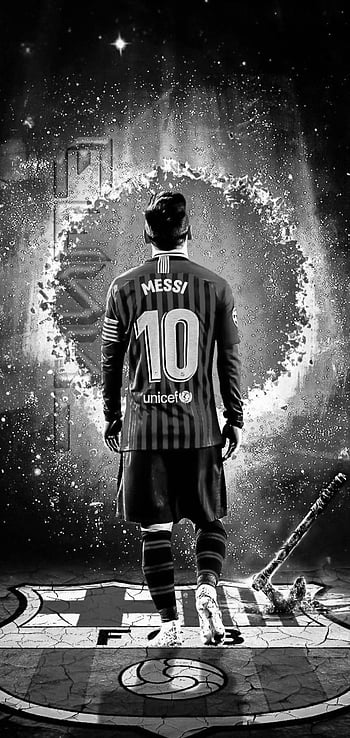

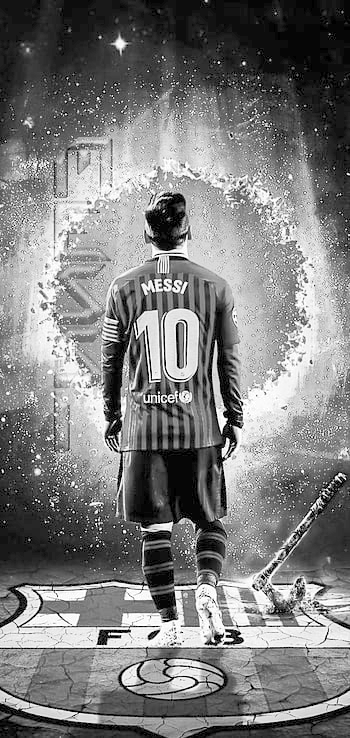

In [3]:
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_image = cdf[image]
    return equalized_image

equalized_image = histogram_equalization(image)

cv2_imshow(image)
cv2_imshow(equalized_image)
